In [4]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [5]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')

In [6]:
cd /home/xupeng/projects/synapse/

/home/xupeng/projects/synapse


## align
raw和mask都用了crop和shift，所以需要对neuron_id做shift
data/align

### processed image

In [52]:
with h5py.File('data/cremi/images/im_A+_v2_200.h5') as f:
    img_A_ = f['main'][:]
#with h5py.File('data/cremi/gt-syn/syn_A+_v2_200.h5') as f:
   # mask_A_ = f['main'][:]
print (img_A.shape,mask_A.shape)

(153, 1842, 1727) (153, 1842, 1727)


In [53]:
with h5py.File('data/cremi/images/im_B+_v2_200.h5') as f:
    img_B_ = f['main'][:]
#with h5py.File('data/cremi/gt-syn/syn_B+_v2_200.h5') as f:
 #   mask_B_ = f['main'][:]
print (img_A.shape,mask_A.shape)

(153, 1842, 1727) (153, 1842, 1727)


In [54]:
with h5py.File('data/cremi/images/im_C+_v2_200.h5') as f:
    img_C_ = f['main'][:]
#with h5py.File('data/cremi/gt-syn/syn_C+_v2_200.h5') as f:
#    mask_C = f['main'][:]
print (img_A.shape,mask_A.shape)

(153, 1842, 1727) (153, 1842, 1727)


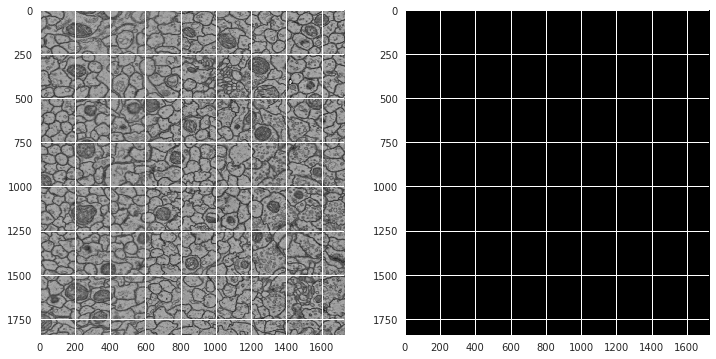

In [10]:
fig,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img_A[0],cmap='gray')
ax[1].imshow(mask_A[0],cmap='gray')

### raw image

In [11]:
with h5py.File('data/public/sample_A_padded_20160501.hdf') as f:
    rawA = f['volumes/raw'][:]
    cleftsA = f['volumes/labels/clefts'][:]
    neuronidA = f['volumes/labels/neuron_ids'][:]

In [12]:
print (img_A.shape,mask_A.shape)
print (rawA.shape,cleftsA.shape,neuronidA.shape)

(153, 1842, 1727) (153, 1842, 1727)
(200, 3072, 3072) (125, 1250, 1250) (125, 1250, 1250)


In [19]:
rawA[:,276:1465,332:1451].shape

(200, 1189, 1119)

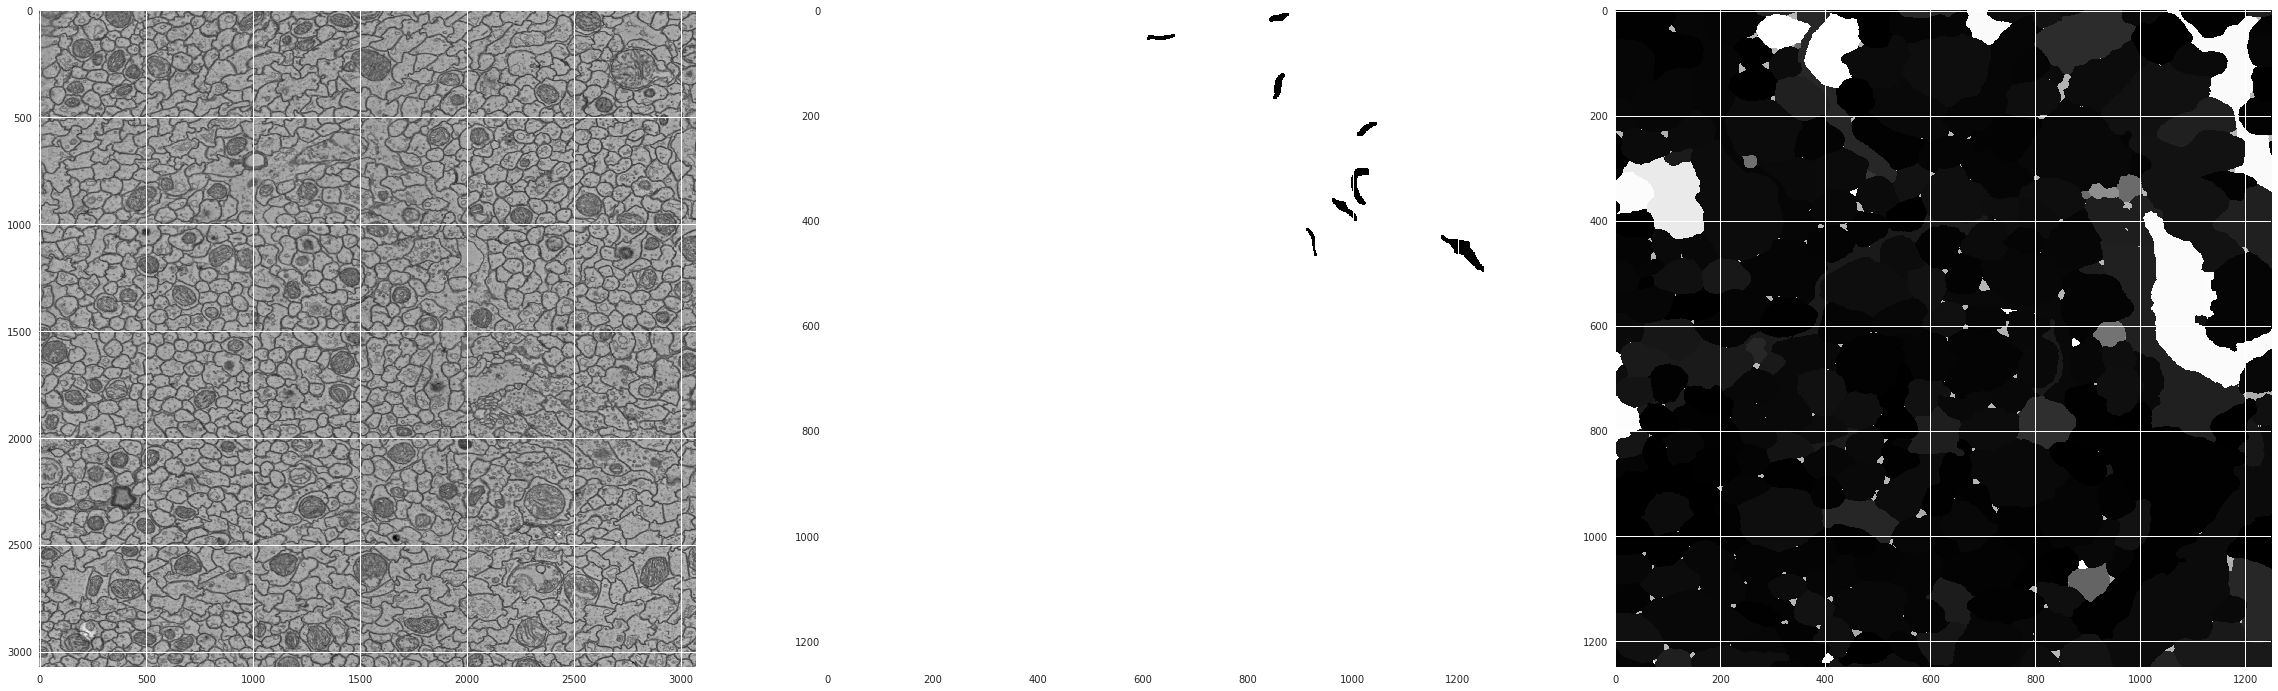

In [13]:
fig,ax = plt.subplots(1,3,figsize = (40,20))
ax[0].imshow(rawA[0],cmap='gray')
ax[1].imshow(cleftsA[0],cmap='gray')
ax[2].imshow(neuronidA[0],cmap='gray')

In [16]:
cropA = np.loadtxt('data/align/crop_A_v2.txt',dtype='str')
cropA_ = np.loadtxt('data/align/crop_A+_v2.txt',dtype='str')
transA = np.loadtxt('data/align/trans_A_v2.txt',dtype='str')
transA_ = np.loadtxt('data/align/trans_A+_v2.txt',dtype='str')

# align script

- T_algin.m use trans_*.txt
- T_align.m 
    - raw volume -> cropped volume 
    - cropped volume -> raw volume
understand and rewrite script into python
write codes to transform neuron id and location

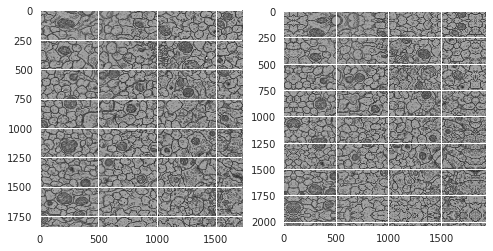

In [39]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(img_A[0],cmap='gray')
ax[1].imshow(np.pad(img_A[0], (100,100), 'symmetric'),cmap='gray')

In [66]:
volume_name = np.array(['A','B','C','A+','C+'])#,'B+','C+'])
bad_slices = np.array([[143],[1,29,30,58,59,91],[28,88,100],
    [65,93,94,122,123,125],[1,29,30,58,59,91],[28,88,100]])
#to be replaced? same name with bad_slice??
bb = np.array([[143],[1,29,30,58,59,91],[28,88,100]])
gg = np.array([[142],[0,28,31,57,60,90],[27,87,99],
    [64,92,95,121,124,126],[0,28,31,57,60,90],[27,87,99]])
#newly-aligned image size
new_align_sz = np.array([[1727,1842],[2069,1748],[1986,2036],
                         [1741,1912],[2898,1937],[1914,1983]]) 
# CREMI ground truth : 125,250,1250
# _v2_200: 200 margin from manual label ??

In [67]:
testdata = origin2align(option='raw',nn=volume_name)

A
B
C
A+
C+


In [68]:
testdatasyn = origin2align(option='syn',nn=volume_name)

In [29]:
testdata[0].shape

(153, 1842, 1727)

In [30]:
img_A.shape

(153, 1842, 1727)

In [49]:
np.unique(img_A - testdata[0])

array([0], dtype=uint8)

In [60]:
np.unique(img_B - testdata[1],return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [61]:
np.unique(img_B,return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [50]:
np.unique(img_C - testdata[2])

array([0], dtype=uint8)

In [71]:
np.unique(img_A_ - testdata[3])

array([0], dtype=uint8)

In [72]:
np.unique(img_C_ - testdata[4])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [74]:
np.unique(mask_A - testdatasyn[0])

TypeError: unsupported operand type(s) for -: 'int' and 'dict'

In [81]:
np.unique(mask_A - np.moveaxis(testdatasyn[0][0],1,2),return_counts=True)

(array([    0,     1,     2, ..., 65529, 65532, 65535], dtype=uint16),
 array([291400118,        71,       101, ...,        71,       111,
               89]))

In [84]:
np.unique(mask_B - np.moveaxis(testdatasyn[0][1],1,2),return_counts=True)

(array([    0,   202,   256, ..., 65481, 65499, 65511], dtype=uint16),
 array([358025965,      2776,         1, ...,   3611073,       163,
                3]))

In [85]:
np.unique(mask_C - np.moveaxis(testdatasyn[0][2],1,2),return_counts=True)

(array([    0, 10732, 10757, ..., 65425, 65497, 65508], dtype=uint16),
 array([423329400,      1741,      3721, ...,         1,         1,
                1]))

In [70]:
def origin2align(option='raw',nn=volume_name):
    '''
    orig -> align_v2_200 (translation)
    gray image(raw)
    seg/syn
    option:raw,syn
    '''
    if option=='raw':
        output = {}
        for nid in range(nn.shape[0]):
            vol = nn[nid]
            print (vol)
            if len(vol)==2: 
                sn='06'
            else:
                sn = '05'
            if vol =='A':
                oo=24
            else:
                oo=23
            pw=0
            ph=0
            if vol[0]=='B':
                ph=200
                if len(vol)==2:
                    ph=700
            #print ('data/public/sample_'+vol+'_padded_2016'+sn+'01.hdf')
            pp = np.cumsum(np.loadtxt('data/align/trans_'+vol+'_v2.txt',delimiter=','),axis=0)
            pp = pp[76] - pp
            #ww=200;suf='v2'
            ww = np.ceil([np.max(pp[:,0]),np.max(pp[:,1]),-np.min(pp[:,0]),-np.min(pp[:,1])]).astype('int')+200
            #print (ww)
            im = h5py.File('data/public/sample_'+vol+'_padded_2016'+sn+'01.hdf')['volumes/raw'][:]
            #im = tmphdf5 #!
            out = np.zeros([153,1250+np.sum(ww[np.array([1,3])]).astype('int'),1250+np.sum(ww[np.array([0,2])]).astype('int')],dtype='uint8')
            suf='v2_200'
            for i in range(153):
                pd = np.round(pp[i,:]).astype('int')
                im2 = np.pad(im[oo+i,:,:],(ph,pw),'symmetric')
                #print (out.shape)
                out[i,:,:] = im2[(912+pd[1]-ww[1]+pw-1):(911+pd[1]+1250+ww[3]+pw),
                                (912+pd[0]-ww[0]+ph-1):(911+pd[0]+1250+ww[2]+ph)]
            out[bad_slices[nid],:,:]=out[gg[nid],:,:]  #in matlab write gg{nid}+1, attention
            output[nid] = out
        return output
    elif option=='syn':
        output_syn = {}
        output_seg = {}
        for nid in range(3):
            vol = nn[nid]
            print (vol)
            if len(vol)==2: 
                sn='06'
            else:
                sn = '05'
            ph=0
            if vol[0]=='B':
                ph=200
                if len(vol)==2:
                    ph=700
            if vol =='A':
                oo=24
            else:
                oo=23
            syn = h5py.File('data/public/sample_'+vol+'_padded_2016'+sn+'01.hdf')['volumes/labels/clefts'][:]
            syn[syn>=1e10] = 0
            seg = h5py.File('data/public/sample_'+vol+'_padded_2016'+sn+'01.hdf')['volumes/labels/neuron_ids'][:]
            pp = np.cumsum(np.loadtxt('data/align/trans_'+vol+'_v2.txt',delimiter=','),axis=0)
            pp = pp[76] - pp
            ww = np.ceil([np.max(pp[:,0]),np.max(pp[:,1]),-np.min(pp[:,0]),-np.min(pp[:,1])]).astype('int')+200
            seg_o = np.zeros([153,1250+np.sum(ww[np.array([0,2])]).astype('int'),1250+np.sum(ww[np.array([1,3])]).astype('int')],dtype='uint64')
            syn_o = np.zeros([153,1250+np.sum(ww[np.array([0,2])]).astype('int'),1250+np.sum(ww[np.array([1,3])]).astype('int')],dtype='uint16')
            for i in range(125):
                pd = np.round(pp[i+14-1,:]).astype('int')
                tmp = np.zeros([3075+ph,3075])
                tmp[912-1:911+1250,912-1:911+1250] = seg[i,:,:]
                seg_o[i+14-1,:,:] = tmp[(912+pd[0]-ww[0]-1):(911+pd[0]+1250+ww[2]),
                                (912+pd[1]-ww[1]-1):(911+pd[1]+1250+ww[3])]
                tmp[912-1:911+1250,912-1:911+1250] = seg[i,:,:]
                syn_o[i+14-1,:,:] = tmp[(912+pd[0]-ww[0]-1):(911+pd[0]+1250+ww[2]),
                                (912+pd[1]-ww[1]-1):(911+pd[1]+1250+ww[3])]
            seg_o[bad_slices[nid],:,:]=seg_o[gg[nid],:,:]
            syn_o[bad_slices[nid],:,:]=syn_o[gg[nid],:,:]
            output_syn[nid] = syn_o
            output_seg[nid] = seg_o
        return output_syn,output_seg

In [168]:
testt,testtt = origin2align(option='syn',nn=volume_name)

In [179]:
rawtt = origin2align(option='raw',nn=volume_name[:1])

In [180]:
rawtt[0].shape

(153, 1842, 1727)

In [175]:
print (testt[0].shape)
print (testt[1].shape)
print (testt[2].shape)
print (testtt[0].shape)
print (testtt[1].shape)
print (testtt[2].shape)

(153, 1727, 1842)
(153, 2069, 1748)
(153, 1986, 2036)
(153, 1727, 1842)
(153, 2069, 1748)
(153, 1986, 2036)


In [177]:
h5py.File('data/cremi/images/im_A_v2_200.h5')['main'][:].shape

(153, 1842, 1727)

In [178]:
h5py.File('data/cremi/gt-syn/syn_A_v2_200.h5')['main'][:].shape 

(153, 1842, 1727)

In [117]:
def align2origin(option='raw',nn=volume_name,sz = new_align_sz):
    for nid in range(6):
        vol = nn[nid]
        if len(vol)==2: 
            sn='06'
        else:
            sn = '05'
        % load/crop result
        result = h5py.File('data/cremi/images/im_'+vol+'_v2_200.h5')['main'][:]
        sz_r = result.shape
        sz_bd = np.round((sz_r - np.array([125,sz[i][0]-400,sz[i][0]-400]))/2.).astype('int')
        result = result[sz_bd[0]:-sz_bd[0], sz_bd[1]:-sz_bd[1], sz_bd[2]:-sz_bd[2]]; 

        pp = np.cumsum(np.loadtxt('data/align/trans_'+vol+'_v2.txt',delimiter=','),axis=0)
        pp = pp[76] - pp
        ww = np.ceil([np.max(pp[:,0]),np.max(pp[:,1]),-np.min(pp[:,0]),-np.min(pp[:,1])]).astype('int')
        pp=pp[14:-14,:]
        # 1250+200*2
        result_o = np.zeros([125,1250,1250],'uint16');
        for i in range(125):
            pd = np.round(pp[i+14-1,:]).astype('int') 

            result_o[i,:,:] = result[(pd[0]+ww[0]-1):(pd[0]+1250+ww[0]),
                                     (pd[1]+ww[1]-1):(pd[1]+1250+ww[1])]

In [116]:
np.eye(10)[3:-4] #(4,end-4)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [104]:
i=0
np.round((np.zeros([3,4,5]).shape - np.array([125,new_align_sz[i][0]-400,new_align_sz[i][0]-400]))/2.).astype('int')


array([ -61, -662, -661])

In [77]:
np.round(ttttt[76,:])

array([0., 0.])

In [34]:
testtt =np.cumsum(np.loadtxt('data/align/trans_A_v2.txt',delimiter=','),axis=0)

In [54]:
ttttt =testtt[76] - testtt
ww = np.ceil([np.max(ttttt[:,0]),np.max(ttttt[:,1]),-np.min(ttttt[:,0]),-np.min(ttttt[:,1])])+200

In [61]:
ww[np.array([1,3])]

array([210., 382.])

In [63]:
np.zeros([153,1250+np.sum(ww[np.array([0,2])]).astype('int'),1250+np.sum(ww[np.array([1,3])]).astype('int')],dtype='uint8').shape


(153, 1727, 1842)

In [42]:
np.zeros([1250,1250,153],dtype='uint8').shape

(1250, 1250, 153)

In [ ]:

        for nid=1:3
            vol = nn{nid}
            sn='05';if numel(vol)==2;sn='06';end
            oo=23; if strcmp(vol,'A');oo=24;end
            syn = h5read([D0 'images/sample_' vol '.hdf'],'/volumes/labels/clefts');
            syn(syn>1e10)=0;
            seg = h5read([D0 'images/sample_' vol '.hdf'],'/volumes/labels/neuron_ids');
            pp=cumsum(load(['align/trans_' vol '_v2.txt']),1);
            pp=-bsxfun(@minus,pp,pp(77,:));
            % 1250+200*2
            %ww=200;suf='v2';
            ww = ceil([max(pp) -min(pp)])+200;suf='v2_200';
            seg_o=zeros([1250+sum(ww([1,3])),1250+sum(ww([2,4])),153],'uint64');
            syn_o=zeros([1250+sum(ww([1,3])),1250+sum(ww([2,4])),153],'uint16');
            for i=1:125
                pd = round(pp(i+14,:)); 
                tmp = zeros(3075+ph,3075);

                tmp(912:911+1250,912:911+1250) = seg(:,:,i);
                seg_o(:,:,i+14) = tmp((912+pd(1)-ww(1)):(911+pd(1)+1250+ww(3)),...
                                (912+pd(2)-ww(2)):(911+pd(2)+1250+ww(4))); 
                tmp(912:911+1250,912:911+1250) = syn(:,:,i);
                syn_o(:,:,i+14) = tmp((912+pd(1)-ww(1)):(911+pd(1)+1250+ww(3)),...
                                (912+pd(2)-ww(2)):(911+pd(2)+1250+ww(4))); 
            end
            seg_o(:,:,bb{nid}+1)=seg_o(:,:,gg{nid}+1);
            syn_o(:,:,bb{nid}+1)=syn_o(:,:,gg{nid}+1);
            %U_h5write(['../data/cremi/align_v2/seg_' sprintf('%s_%s.h5',vol,suf)],'/main',seg_o,5,'uint64');
            %U_h5write(['../data/cremi/align_v2/syn_' sprintf('%s_%s.h5',vol,suf)],'/main',syn_o,5,'uint16');
        end
    end
    
    
    
    
    
case 2 % align_v2_200 (translation) -> orig
    switch tid
    case 2.1 % seg/syn
        for nid=1:6
            vol = nn{nid}
            sn='05';if numel(vol)==2;sn='06';end
            % load/crop result
            result = h5read(['results/sample_' vol '.hdf'],'/main');
            sz_r = size(result);
            sz_bd = round((sz_r-[sz{nid}-400 125])/2);
            result = result(sz_bd(1)+1:end-sz_bd(1), sz_bd(2)+1:end-sz_bd(2), sz_bd(3)+1:end-sz_bd(3)); 

            pp=cumsum(load(['align/trans_' vol '_v2.txt']),1);
            pp=bsxfun(@minus,pp,pp(77,:));
            ww = ceil([max(pp) -min(pp)]);
            pp=pp(15:end-14,:);
            % 1250+200*2
            result_o = zeros([1250,1250,125],'uint16');
            for i=1:125
                pd = round(pp(i+14,:)); 

                result_o(:,:,i) = result((pd(1)+ww(1)):(pd(1)+1250+ww(1)),...
                                         (pd(2)+ww(2)):(pd(2)+1250+ww(2))); 
            end
            %U_h5write(['../data/cremi/align_v2/syn_' sprintf('%s_%s.h5',vol,suf)],'/main',syn_o,5,'uint16');
        end
    end
end